In [2]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
from math import ceil,sin,cos, atan2, pi, sqrt
import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions23 import *

In [3]:
path_bat = '/home/jvalenti/MOAD/grid/bathymetry_202108.nc'
bat = xr.open_dataset(path_bat,decode_times=False).Bathymetry

In [4]:
path_d='/results2/SalishSea/nowcast-green.202111/30oct22/SalishSea_1h_20221030_20221030_grid_T.nc'
path_d2='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_T.nc'
path_area='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_T.nc'
path_w='/results2/SalishSea/nowcast-green.202111/30oct22/SalishSea_1h_20221030_20221030_grid_W.nc'
path_w2='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_W.nc'
path_u='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_U.nc'
path_v='/results2/SalishSea/nowcast-green.202111/31oct22/SalishSea_1h_20221031_20221031_grid_V.nc'

path_mask = '/ocean/jvalenti/MOAD/grid2/mesh_mask202108_TD.nc'
e3t = xr.open_dataset(path_d,decode_times=False).e3t
e3t2 = xr.open_dataset(path_d2,decode_times=False).e3t
e3t = xr.concat([e3t,e3t2],dim='time_counter')
Area = xr.open_dataset(path_area,decode_times=False).area
mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy
zz_ww = xr.open_dataset(path_mask,decode_times=False).gdepw_0
e3t0 = xr.open_dataset(path_mask,decode_times=False).e3t_0

In [4]:
ssh = xr.open_dataset(path_d,decode_times=False).sossheig[:,300,297:302]
ssh2 = xr.open_dataset(path_d2,decode_times=False).sossheig[:,300,297:302]
ssh = xr.concat([ssh,ssh2],dim='time_counter')
mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy[0,300,297:302]
u = xr.open_dataset(path_u,decode_times=False).vozocrtx[:,:,300,297:302]
w = xr.open_dataset(path_w,decode_times=False).vovecrtz[:,:,300,297:302]
w2 = xr.open_dataset(path_w2,decode_times=False).vovecrtz[:,:,300,297:302]
w = xr.concat([w,w2],dim='time_counter')
depthw = xr.open_dataset(path_w,decode_times=False).depthw
depthu = xr.open_dataset(path_u,decode_times=False).depthu
totaldepth = zz_ww[0, mbathy,300, 297:302]

In [5]:
# ssh = xr.open_dataset(path_d,decode_times=False).sossheig[:,445,302:307]
# ssh2 = xr.open_dataset(path_d2,decode_times=False).sossheig[:,445,302:307]
# ssh = xr.concat([ssh,ssh2],dim='time_counter')
# mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy[0,445,302:307]
# u = xr.open_dataset(path_u,decode_times=False).vozocrtx[:,:,445,302:307]
# w = xr.open_dataset(path_w,decode_times=False).vovecrtz[:,:,445,302:307]
# w2 = xr.open_dataset(path_w2,decode_times=False).vovecrtz[:,:,445,302:307]
# w = xr.concat([w,w2],dim='time_counter')
# depthw = xr.open_dataset(path_w,decode_times=False).depthw
# depthu = xr.open_dataset(path_u,decode_times=False).depthu
# totaldepth = zz_ww[0, mbathy,445,302:307]

In [6]:
#Define domain
lon = np.array([250.,750., 1250.,1750.,2250.])
#lonu = np.array([500.,1000., 1500.,2000.,2500])
#latv = np.array([500.,1000.])
#lat = np.array([250.,750])
time = np.linspace(0,2*86400,48)

dim = 5
dep = len(depthu)
t = len(time)

#U = Field('U', u, dtype=np.float32)
#U = Field('U', u, lon=lonu, lat=None, depth=depthu, time=time)
U = Field('U', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
V = Field('V', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
W = Field('W', w, lon=lon, lat=None, depth=depthw, time=time)
SSH = Field('SSH', ssh, lon=lon, lat=None, depth=None, time=time)
Td = Field('TD', totaldepth, lon=lon, lat=None, depth=None, time=None)

In [ ]:
#Define domain
lon = np.array([250.,750., 1250.,1750.,2250.])
#lonu = np.array([500.,1000., 1500.,2000.,2500])
#latv = np.array([500.,1000.])
#lat = np.array([250.,750])
time = np.linspace(0,2*86400,48)

dim = 5
dep = len(depthu)
t = len(time)

#U = Field('U', u, dtype=np.float32)
#U = Field('U', u, lon=lonu, lat=None, depth=depthu, time=time)
U = Field('U', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
V = Field('V', np.zeros((dep, dim), dtype=np.float32), lon=lon, lat=None, depth=depthu)
W = Field('W', w, lon=lon, lat=None, depth=depthw, time=time)
SSH = Field('SSH', ssh, lon=lon, lat=None, depth=None, time=time)
Td = Field('TD', totaldepth, lon=lon, lat=None, depth=None, time=None)

In [7]:
fieldset = FieldSet(U,V)
fieldset.add_field(W)
fieldset.add_field(SSH)
fieldset.add_field(Td)

In [8]:
class MPParticle(JITParticle):
    fact = Variable('fact', initial =  1.0) 
class MPParticle2(JITParticle):
    fact = Variable('fact', initial =  0.0) 

In [9]:
def DeleteParticle(particle, fieldset, time):
    """Delete particle from OceanParcels simulation to avoid run failure
    """
    
    print(f'Particle {particle.id} lost !! [{particle.time}, {particle.depth}, {particle.lat}, {particle.lon}]')
    particle.delete()

In [19]:
def Advection(particle, fieldset, time):
    ssh = fieldset.SSH[time, particle.depth, particle.lat, particle.lon]
    td = fieldset.TD[time, particle.depth, particle.lat, particle.lon]
    factor = (1+ssh/td)
    (u1, v1, w1) = fieldset.UVW[time, particle.depth, particle.lat, particle.lon]
    w1 =  fieldset.W[time , particle.depth/factor, particle.lat, particle.lon]
    lon1 = particle.lon + u1*.5*particle.dt
    lat1 = particle.lat + v1*.5*particle.dt
    dep1 = particle.depth + w1*.5*particle.dt/factor
    if dep1 <= 0.5:
        dep1 = 0.51
    (u2, v2, w2) = fieldset.UVW[time + .5 * particle.dt, dep1, lat1, lon1]
    w2 =  fieldset.W[time + .5 * particle.dt, dep1/factor, lat1, lon1]
    lon2 = particle.lon + u2*.5*particle.dt
    lat2 = particle.lat + v2*.5*particle.dt
    dep2 = particle.depth + w2*.5*particle.dt/factor
    if dep2 <= 0.5:
        dep2 = 0.51
    (u3, v3, w3) = fieldset.UVW[time + .5 * particle.dt, dep2, lat2, lon2]
    w3 = fieldset.W[time + .5 * particle.dt, dep2/factor, lat2, lon2]
    lon3 = particle.lon + u3*particle.dt
    lat3 = particle.lat + v3*particle.dt
    dep3 = particle.depth + w3*particle.dt/factor
    if dep3 <= 0.5:
        dep3 = 0.51
    (u4, v4, w4) = fieldset.UVW[time + particle.dt, dep3, lat3, lon3]
    w4 = fieldset.W[time + particle.dt, dep3/factor, lat3, lon3]
    particle.lon += (u1 + 2*u2 + 2*u3 + u4) / 6. * particle.dt
    particle.lat += (v1 + 2*v2 + 2*v3 + v4) / 6. * particle.dt
    sshn = fieldset.SSH[time+particle.dt, particle.depth, particle.lat, particle.lon]
    tdn = fieldset.TD[time, particle.depth, particle.lat, particle.lon]
    wssh = (sshn-ssh)*(1-particle.depth/(factor*(td+ssh)))/particle.dt
    if particle.depth + ((w1 + 2*w2 + 2*w3 + w4) / 6. - wssh) * particle.dt/factor<=0.5:
        particle.depth = 0.51
    else:
        particle.depth = particle.depth*(1-(ssh*(tdn-td)**2)/(td*tdn)) + ((w1 + 2*w2 + 2*w3 + w4) / 6. - wssh) * particle.dt/factor

In [20]:
n = 500
KE=Advection
lon_g = np.random.uniform(low=250, high=2000, size=(n,))
depth_g = np.random.uniform(low=0.5, high=30, size=(n,))
lat_g = np.ones(n,)*750
pset = ParticleSet(fieldset, pclass=MPParticle, lon=lon_g, depth=depth_g,lat = lat_g)
#pset2 = ParticleSet(fieldset, pclass=MPParticle2, lon=lon_g, depth=depth_g,lat = lat_g)
output_file = pset.ParticleFile(name='/home/jvalenti/MOAD/results/Output.zarr', outputdt=3600)
#output_file2 = pset2.ParticleFile(name='Output2.zarr', outputdt=3600)
pset.execute(KE , runtime=2*86400, dt=10, output_file=output_file,recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})
#pset2.execute(KE , runtime=2*86400, dt=10, output_file=output_file2,recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle})

INFO: Compiled ArrayMPParticleAdvection ==> /tmp/parcels-2894/lib457357c495b9462803218bd9f71fe3e7_0.so


Particle 752 lost !! [23400.0, 0.5, 750.0, 636.2149658203125]
Particle 873 lost !! [29900.0, 0.5000001788139343, 750.0, 1570.8134765625]


INFO: Output files are stored in /home/jvalenti/MOAD/results/Output.zarr.
 56%|█████▋    | 97200.0/172800.0 [00:03<00:03, 21739.90it/s] 

Particle 812 lost !! [99880.0, 0.5001112222671509, 750.0, 1211.3773193359375]


 60%|██████    | 104400.0/172800.0 [00:04<00:04, 16481.45it/s]

Particle 703 lost !! [105460.0, 0.5000000596046448, 750.0, 1385.20166015625]


 67%|██████▋   | 115200.0/172800.0 [00:05<00:04, 11729.63it/s]

Particle 629 lost !! [114480.0, 0.5000001788139343, 750.0, 1212.4130859375]


 71%|███████   | 122400.0/172800.0 [00:06<00:05, 9761.84it/s] 

Particle 715 lost !! [120390.0, 0.5000317096710205, 750.0, 1307.7506103515625]


100%|██████████| 172800.0/172800.0 [00:13<00:00, 12734.78it/s]


In [21]:
dat = xr.load_dataset('/home/jvalenti/MOAD/results/Output.zarr')
dat2 = xr.load_dataset('Output2.zarr')

/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/home/jvalenti/conda_envs/Parcels_v2/lib/python3.10/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


In [22]:
mbathy = xr.open_dataset(path_mask,decode_times=False).mbathy
# def profdif(t):
#     i = 445
#     j = 304
#     kmax = int(mbathy[0,i,j].item())
#     dA = np.cumsum(e3t[t,:kmax,i,j])
#     dC = np.cumsum(e3t0[0,:kmax,i,j])
#     i = 445
#     j = 305
#     kmax = int(mbathy[0,i,j].item())
#     dB = np.cumsum(e3t[t,:kmax,i,j])
#     i = 445
#     j = 303
#     kmax = int(mbathy[0,i,j].item())
#     dD = np.cumsum(e3t[t,:kmax,i,j])
#     i = 445
#     j = 302
#     kmax = int(mbathy[0,i,j].item())
#     dE = np.cumsum(e3t[t,:kmax,i,j])
#     return dA,dB,dC,dD,dE

def profdif(t):
    i = 300
    j = 299
    kmax = int(mbathy[0,i,j].item())
    dA = np.cumsum(e3t[t,:kmax,i,j])
    dC = np.cumsum(e3t0[0,:kmax,i,j])
    i = 300
    j = 300
    kmax = int(mbathy[0,i,j].item())
    dB = np.cumsum(e3t[t,:kmax,i,j])
    i = 300
    j = 298
    kmax = int(mbathy[0,i,j].item())
    dD = np.cumsum(e3t[t,:kmax,i,j])
    i = 300
    j = 297
    kmax = int(mbathy[0,i,j].item())
    dE = np.cumsum(e3t[t,:kmax,i,j])
    return dA,dB,dC,dD,dE

def ploting(axs,t):
    dA,dB,dC,dD,dE = profdif(t)
    for i in range(len(dA)):
        axs.axhline(y=-dA[i],xmin=0.5,xmax=0.75)
    for i in range(len(dB)):
        axs.axhline(y=-dB[i],xmin=0.75,xmax=1)
    #for i in range(len(dC)):
    #   axs.axhline(y=-dC[i],c='r',alpha = 0.2)
    for i in range(len(dD)):
       axs.axhline(y=-dD[i],xmin=0.25,xmax=0.5)
    for i in range(len(dE)):
       axs.axhline(y=-dE[i],xmin=0,xmax=0.25)
    
    #plt.fill_between(np.linspace(0,500,len(dA)), -np.ones(len(dA))*float(dA[-1]),-np.ones(len(dA))*float(dA[-1])-5, color='brown',zorder=5,alpha = 0.3) 
    #plt.fill_between(np.linspace(500,1000,len(dB)), -np.ones(len(dB))*float(dB[-1]),-np.ones(len(dB))*float(dB[-1])-15, color='brown',zorder=5,alpha = 0.3)  
    #plt.xlim([0,2000])
    plt.ylim([-28,0])

In [23]:
def anim2(file1,file2,fps=1):  
    #box=([0,2e3,2e3,0,0],[0,0,depth[-1],depth[-1],0])
    fig,axs=plt.subplots(1,1,figsize=(10,5))
    #axs[0].scatter(dat.lon[:,0],dat.z[:,0],s=5)
    #ax2 = axs[2].twiny()
    #ax2.plot(Kz_col,depth,c='r')
   
    #axs[0].plot(box[0],box[1],c='grey',linewidth=3)
    #axs[1].plot(box[0],box[1],c='grey',linewidth=3)

    #axs[0].invert_yaxis()
    #axs[0].set_title('Initial condition (t: 0s)')
    axs.set_ylabel('Depth (m)')
    lent = np.linspace(0,48,len(file1.lon[0,:]))
    lent[-1]=lent[-2]
    def update(frame):              
        axs.clear()
        #axs[1].clear()
        axs.invert_yaxis()
        axs.set_title("Blue points z-stretch corrected")                 
        axs.scatter(file1.lon[:,frame],-file1.z[:,frame],s=5)
        #axs[1].invert_yaxis()
        #axs[1].set_title("Without e3t correction")                 
        #axs.scatter(file2.lon[:,frame],-file2.z[:,frame],s=5)
        ploting(axs,round(lent[frame]))
        #ploting(axs[1],round(lent[frame]))
        axs.set_xlim([0,2000])
        axs.set_ylim([-20,0])       
        #axs[1].set_xlim([0,2000])
        #axs[1].set_ylim([-30,0])                 
        return 
    return animation.FuncAnimation(fig, update, frames=np.arange(0,len(file1.lon[0,:]),fps))

(25.0, 0.0)

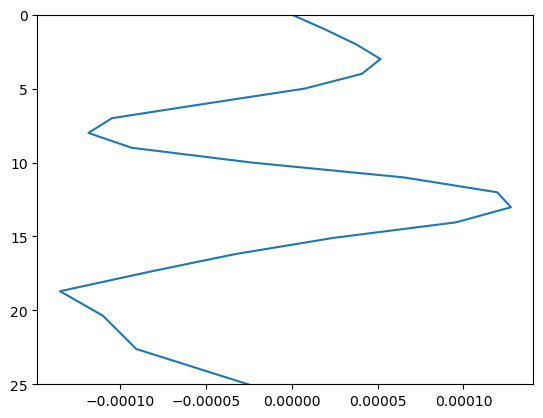

In [44]:
plt.plot(w[0,:,1],depthw)
plt.ylim([25,0])

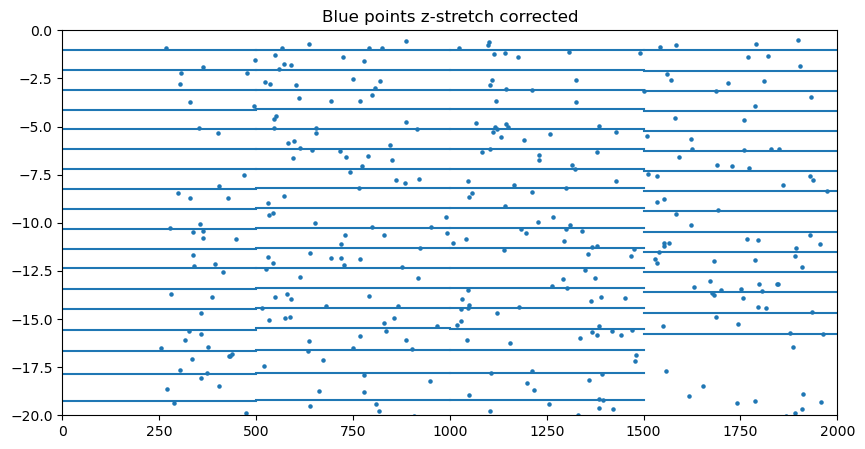

In [24]:
ss =[]
ani = anim2(dat,dat2,fps=1)
f = r"/home/jvalenti/MOAD/animations/box.gif" 
FFwriter = animation.FFMpegWriter()
ani.save(f, writer = FFwriter)

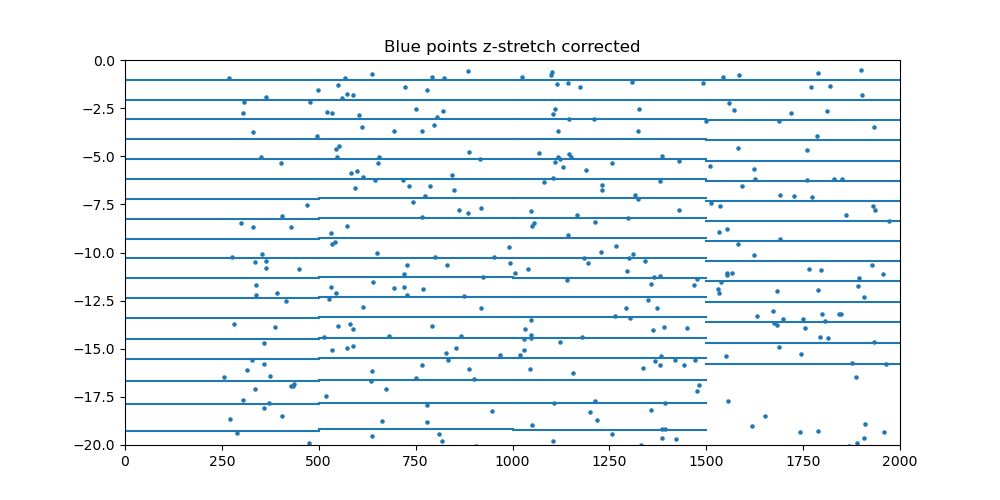

In [25]:
from IPython.display import Image
with open(f,'rb') as anim:
     display(Image(anim.read()))

In [26]:
# fig = plt.figure(figsize=(4,7))
# def update(frame):
#         fr = round(frame)
#         plt.clf()
#         ploting(fr)
# anim = animation.FuncAnimation(fig, update, frames=np.arange(0,23,1))
# f2 = r"/home/jvalenti/MOAD/animations/anim.gif" 
# FFwriter = animation.FFMpegWriter()
# anim.save(f2, writer = FFwriter)

In [27]:
# with open(f2,'rb') as anim:
#      display(Image(anim.read()))